# **Overview**

 Fashion-MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. It is a more challenging dataset than the MNIST dataset, which consists of handwritten digits. This is because the Fashion-MNIST images are more complex and have more variation.

Fashion-MNIST is a popular dataset for training and evaluating machine learning models for image classification. It is a good starting point for beginners, as it is relatively small and easy to work with

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


# **Import Libraries**

In [ ]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras.layers import MaxPool2D, Input, Concatenate, GlobalMaxPooling2D
import matplotlib.ticker as mticker
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.layers import AveragePooling2D
from keras.callbacks import ReduceLROnPlateau

# **Read Data**

In [ ]:
# read the data (train data and test data )
train=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

# **Explore Data**

In [ ]:
# get the shape of train 
train.shape

(60000, 785)

In [ ]:
# get the shape of test 
test.shape

(10000, 785)

* there are 60,0000 images in train , and the size of image is 28*28
* there are only 10,000 images in test , and the size of image is 28*28

In [ ]:
# show the first 10 sample in train data
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [ ]:
# show the first 10 sample in test data
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [ ]:
#returns the count of unique values in label
train['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

# **Check Missing Values In Train And Test**

In [ ]:
# check null values in train data
train.isna().sum().sum()

0

**The Result :** No Null Values in train Data

In [ ]:
# check null values in test data 
test.isna().sum().sum()

0

**The Result :** No Null Values in test Data

# **Check Duplication In Train And Test**

In [ ]:
# check duplication in train data
train.duplicated().sum() 

43

In [ ]:
# drop duplication in train data 
train.drop_duplicates(inplace=True)

In [ ]:
# check null values after dropping null duplication
train.duplicated().sum()

0

In [ ]:
# check duplication in test data
test.duplicated().sum() 

1

In [ ]:
# drop duplication in test data 
test.drop_duplicates(inplace=True)

In [ ]:
# check null values after dropping null duplication
test.duplicated().sum()

0

# **Correlation Analysis**

In [ ]:
# correlation analysis 
# get the correlation Among features and between features and label in train data
train.corr()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,1.000000,-0.000676,0.002942,-0.010453,-0.007119,-0.004629,-0.011058,-0.036828,-0.085385,-0.161761,...,-0.362817,-0.258533,-0.183235,-0.090386,-0.077161,-0.066846,-0.018054,0.045588,0.059963,0.021773
pixel1,-0.000676,1.000000,0.297899,0.067551,0.046607,0.026630,0.026172,0.012096,0.012225,0.009644,...,-0.000641,0.004628,0.004609,0.000975,-0.002305,-0.002442,-0.000109,0.008764,0.026388,0.041581
pixel2,0.002942,0.297899,1.000000,0.575033,0.138709,0.054353,0.033184,0.022766,0.017138,0.016821,...,0.000494,0.004861,0.006817,0.002097,-0.004427,-0.002341,0.004271,0.014215,0.021296,0.022161
pixel3,-0.010453,0.067551,0.575033,1.000000,0.387468,0.118136,0.087300,0.060937,0.035942,0.029674,...,0.010095,0.016706,0.018323,0.006163,-0.003821,-0.001494,0.006861,0.013151,0.009946,0.015657
pixel4,-0.007119,0.046607,0.138709,0.387468,1.000000,0.573172,0.325683,0.242987,0.141033,0.085302,...,0.009690,0.018710,0.023391,0.016759,0.009700,0.010101,0.023940,0.012388,0.003072,0.008422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.066846,-0.002442,-0.002341,-0.001494,0.010101,0.021514,0.032318,0.027065,0.019507,0.024986,...,-0.074218,-0.008964,0.043000,0.336772,0.790184,1.000000,0.749621,0.349134,0.178656,0.073421
pixel781,-0.018054,-0.000109,0.004271,0.006861,0.023940,0.025971,0.038560,0.030478,0.026278,0.034245,...,-0.042288,0.008640,0.045504,0.131133,0.439563,0.749621,1.000000,0.645871,0.334548,0.133829
pixel782,0.045588,0.008764,0.014215,0.013151,0.012388,0.028859,0.044113,0.029461,0.022747,0.020991,...,-0.002795,0.034103,0.074004,0.092843,0.152620,0.349134,0.645871,1.000000,0.658959,0.225500
pixel783,0.059963,0.026388,0.021296,0.009946,0.003072,0.022939,0.030802,0.016128,0.005947,0.000090,...,0.001906,0.026552,0.054235,0.077767,0.101160,0.178656,0.334548,0.658959,1.000000,0.451929


# **Split Data**

In [ ]:
# divide the data into x_train,y_train,x_test,y_test
# drop label from train data
# drop label from test data
y_train=train['label']
x_train=train.drop(labels=['label'],axis=1)
y_test=test['label']
x_test=test.drop(labels=['label'],axis=1)

In [ ]:
# get the shape of x_test
x_test.shape

(9999, 784)

# **Data Visualization**

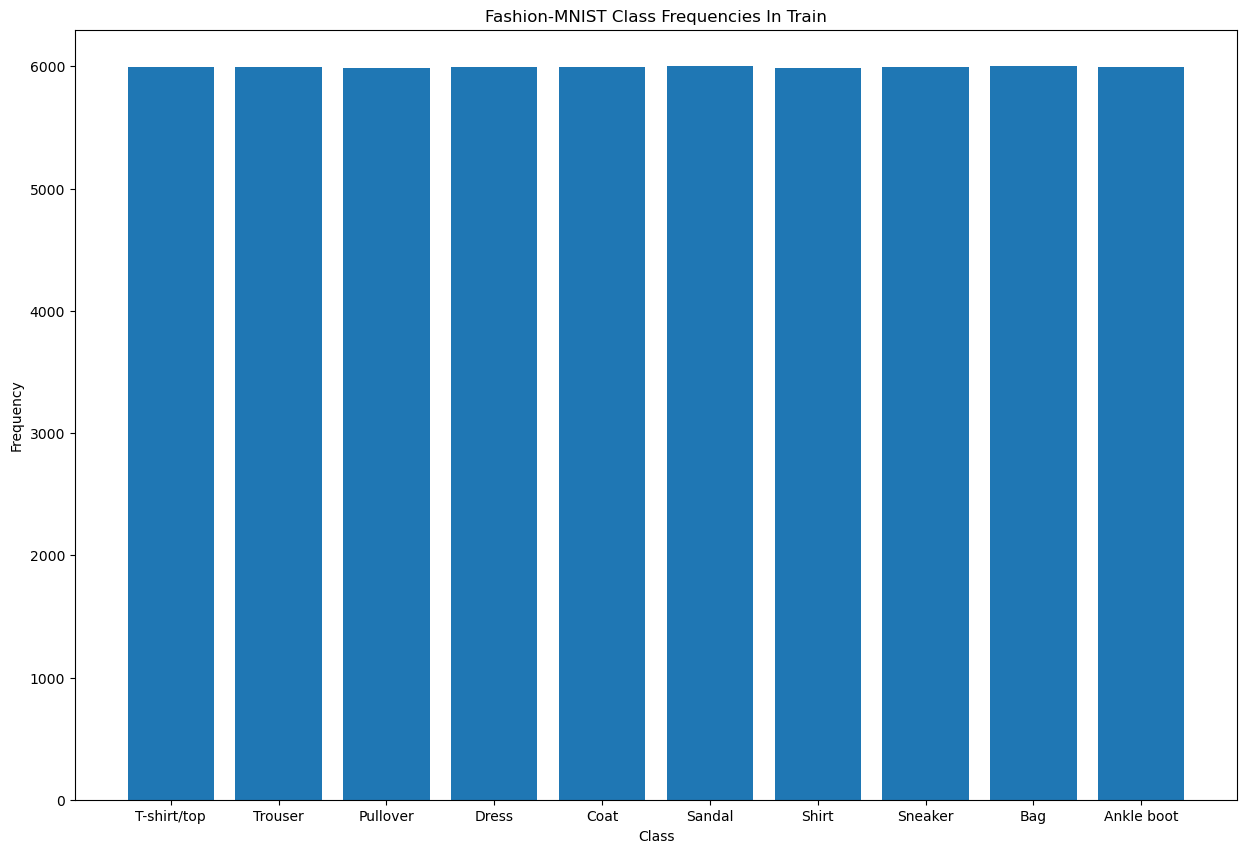

In [ ]:
# Define the class names for each label
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Calculate the frequency of each class in the training set
class_freq = np.bincount(y_train)
# Create a bar chart of the class frequencies
plt.figure(figsize=(15,10))
plt.bar(class_names, class_freq)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Fashion-MNIST Class Frequencies In Train")
plt.show()

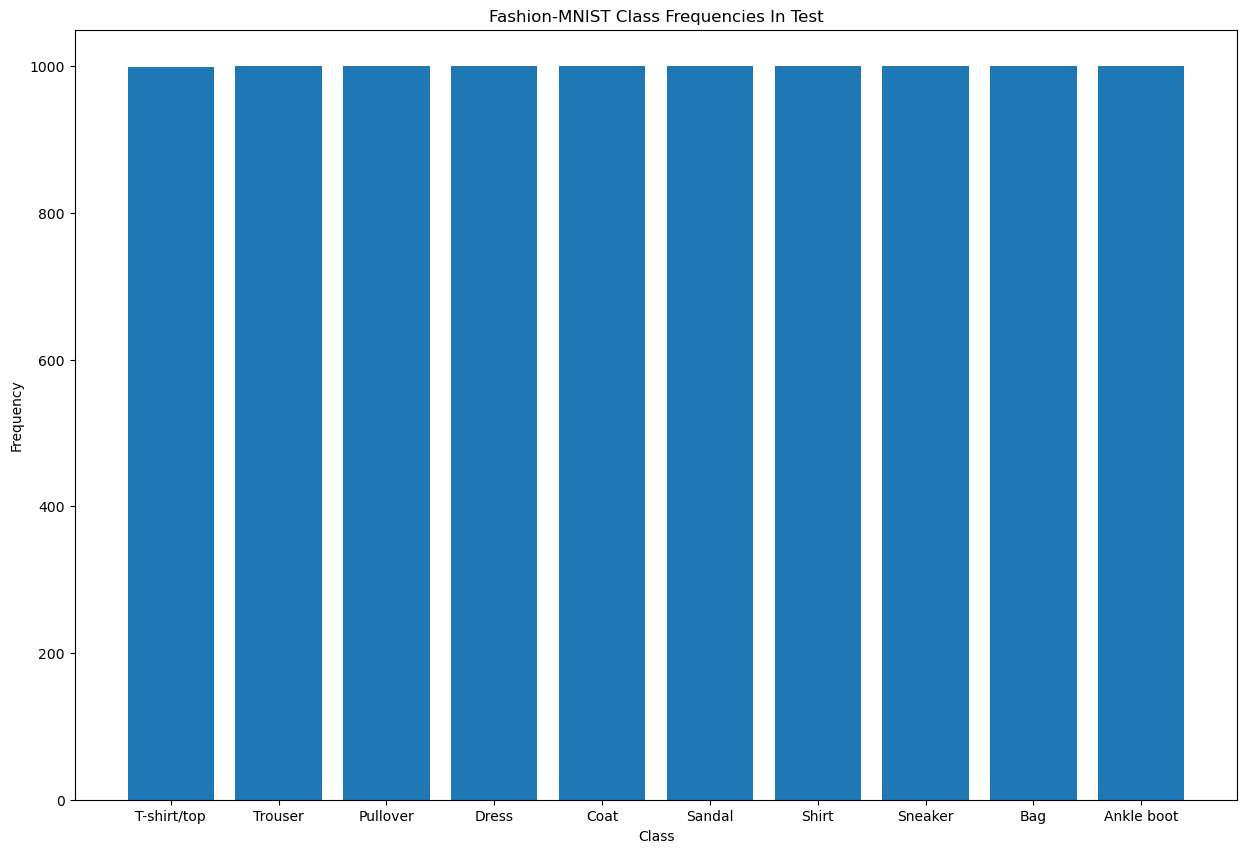

In [ ]:
# Define the class names for each label
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Calculate the frequency of each class in the testing set
class_freq = np.bincount(y_test)

# Create a bar chart of the class frequencies
plt.figure(figsize=(15,10))
plt.bar(class_names, class_freq)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Fashion-MNIST Class Frequencies In Test")
plt.show()

# **Draw Images**

In [ ]:
# labeling the classes
lebels = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

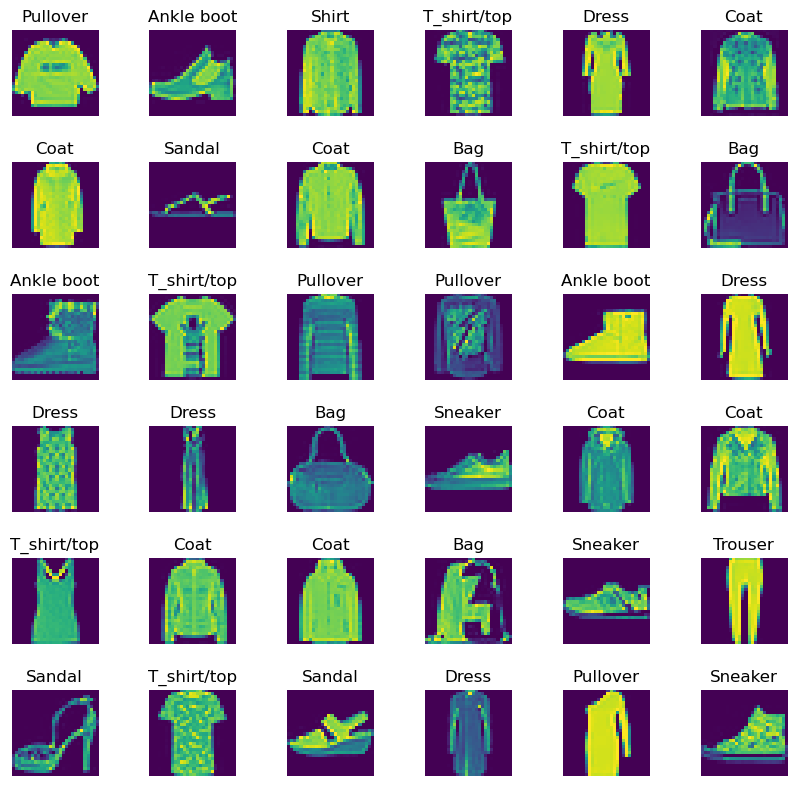

In [ ]:
"""
creates a figure with a 6x6 grid of subplots 
and displays 36 randomly selected images and their corresponding labels from the training set
"""

plt.figure(figsize=(10,10))

for index in range(36):
    plt.subplot(6, 6, index+1)
    plt.imshow(x_train[index])
    plt.title(lebels[int(y_train[index])])
    plt.axis('off')
    plt.subplots_adjust( wspace=0.6)
plt.show()

# **Preprocessing**

# **1-Reshape Into 28*28**

In [ ]:
# reshape x_train from 784 into 28*28
x_train = x_train.values.reshape(59957,28,28)

In [ ]:
# get the shape of x_train
x_train.shape

(59957, 28, 28)

In [ ]:
# get the shape of x_test
x_test.shape

(9999, 784)

In [ ]:
# reshape x_test from 784 into 28*28
x_test = x_test.values.reshape(9999,28,28)

In [ ]:
# get the shape of x_train
x_train.shape

(59957, 28, 28)

In [ ]:
# get the shape of x_test
x_test.shape

(9999, 28, 28)

# **2-Label Encoding**

In [ ]:
"""
  to_categorical() is used to convert 
 the y_train and y_test arrays from their 
 original integer representation to a binary class matrix representation,
"""
y_train = to_categorical(y_train, num_classes = 10)
y_test=to_categorical(y_test,num_classes=10)

# **3-Normalization**

In [ ]:
# make normalization on data 
# make normalization by dividing the values of (x_train,x_test) by 255.
x_train=x_train/255
x_test=x_test/255

# **Split The Train Data Into Train And Validation** 

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train,random_state=1)

# **LeNet-5 Architecture As the Same**

![LeNet image](https://static.packt-cdn.com/products/9781788831109/graphics/B09698_04_07.jpg "LeNet5")


**LeNet-5 is a classic convolutional neural network architecture developed by Yann LeCun in 1998 for handwritten digit recognition. It consists of seven layers, including three convolutional layers and two fully connected layers.**

In [ ]:
# Building The Model

"""
1- Creates a new Sequential model
2- Adds a "2D convolutional layer" with 6 filters, a kernel size of 5x5, and ReLU activation. 
The input_shape parameter specifies the shape of the input data, 
which is a grayscale image with dimensions of 28x28 pixels and a single channel.
3-Adds a 2D max pooling layer with a pool size of 2x2 and a stride of 2.
4-Adds a second 2D convolutional layer with 16 filters, a kernel size of 5x5, and ReLU activation.
5-Adds a second 2D max pooling layer with a pool size of 2x2 and a stride of 2.
6-Flattens the output of the previous layer into a 1D vector
7- Adds a fully connected layer with 120 neurons and ReLU activation.
8- Adds a second fully connected layer with 84 neurons and ReLU activation.
9-Adds an output layer with 10 neurons, one for each possible digit (0-9), and a softmax activation function.
10-Builds the model and make summarization on model
"""


# Define the LeNet-5 architecture
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(16, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [ ]:
# Compile the model

"""After defining the neural network architecture, 
the next step is to compile the model using the compile() method in Keras
"""

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Define the learning rate annealer callback
lr_annealer = ReduceLROnPlateau(monitor="val_accuracy", factor=0.2, patience=3, min_lr=0.0001, verbose=1)

# Train the model with the learning rate annealer callback
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=30, batch_size=128, callbacks=[lr_annealer]) 

Epoch 1/30
375/375 [==============================] - 11s 5ms/step - loss: 0.7323 - accuracy: 0.7308 - val_loss: 0.5027 - val_accuracy: 0.8160 - lr: 0.0010
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4692 - accuracy: 0.8284 - val_loss: 0.4277 - val_accuracy: 0.8472 - lr: 0.0010
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4057 - accuracy: 0.8542 - val_loss: 0.3916 - val_accuracy: 0.8615 - lr: 0.0010
Epoch 4/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3673 - accuracy: 0.8673 - val_loss: 0.3691 - val_accuracy: 0.8648 - lr: 0.0010
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3426 - accuracy: 0.8748 - val_loss: 0.3549 - val_accuracy: 0.8723 - lr: 0.0010
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3214 - accuracy: 0.8828 - val_loss: 0.3329 - val_accuracy: 0.8790 - lr: 0.0010
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - l

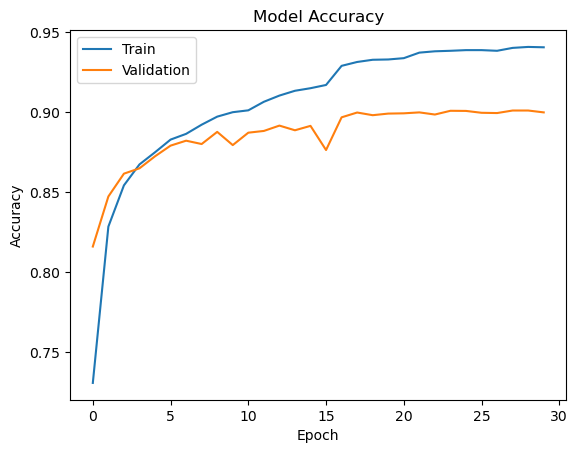

In [ ]:
# Plot the training and validation accuracy with the number of epochs
# creates a line plot of the training and validation accuracy over each epoch using the matplotlib library
# history dictionary contains the training and validation metrics for each epoch
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

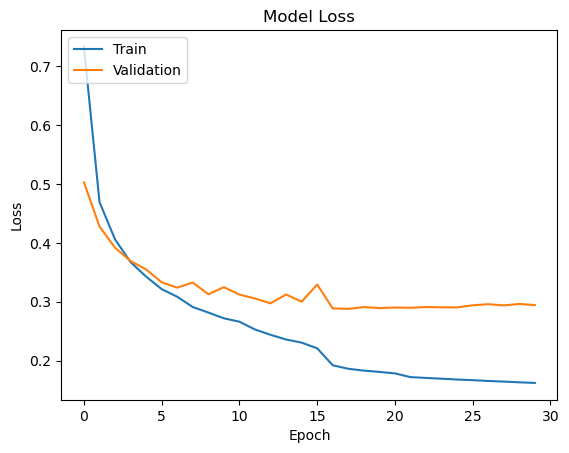

In [ ]:
# Plot the training and validation loss with the number of epochs
# creates a line plot of the training and validation loss over each epoch using the matplotlib library
# history dictionary contains the training and validation metrics for each epoch
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
# check model generalization
# evaluate the performance of model 
score = model.evaluate(x_test, y_test)
print(score) 
print("The Loss Is {}".format(score[0]))
print("The Accuracy Is {}".format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.9003
[0.2826773524284363, 0.9002900123596191]
The Loss Is 0.2826773524284363
The Accuracy Is 0.9002900123596191


# **LeNet-5 Architecture With HyberBand Tunning HyperParamters**

**I Will Use Kreas Tuner to get the best hyperparameters**

In [ ]:
#install keras tuner
!pip install -q -U keras-tuner
import keras_tuner as kt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.83.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


In [ ]:
# building a function that return the model after building it 

"""
This is a function model_builder(hp) 
that defines a Keras model with some hyperparameters that can be tuned using Keras Tuner
"""

"""
steps
1-Defines the neural network architecture, which  consists of two convolutional layers, two max pooling layers,
and three fully connected layers. The hyperparameters that will be 
tuned are the number of units in the first fully connected layer and the learning rate of the optimizer.
2-Defines a hyperparameter hp_units for the number of units in the first fully connected layer.
3-Defines a hyperparameter hp_learning_rate for the learning rate of the Adam optimizer.
4- compile the model with The Adam optimizer,The CategoricalCrossentropy loss function and the accuracy metric
5- return the model


"""
def model_builder(hp):
    model_2 = Sequential()
    model_2.add(Conv2D(6, kernel_size=(5, 5), activation="relu", input_shape=(28, 28, 1)))
    model_2.add(MaxPool2D(strides=2))
    model_2.add(Conv2D(16, kernel_size=(5, 5), activation="relu"))
    model_2.add(MaxPool2D(strides=2))
    model_2.add(Flatten())
    
    hp_units = hp.Choice('units', values=[120, 240])
    model_2.add(Dense(units=hp_units, activation='relu'))
    model_2.add(Dense(84, activation='relu'))
    model_2.add(Dense(10, activation='softmax'))



    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model_2.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    return model_2

In [ ]:
"""
EarlyStopping is a Keras callback that stops the training of a neural network when  metric, 
such as validation loss or accuracy, stops improving. 
"""
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Instantiate the tuner to perform the hypertuning


"""
Hyperband is a class from the Keras Tuner library that performs a hyperparameter search using a technique called Hyperband.
Hyperband is an efficient algorithm for hyperparameter tuning that combines random search with early stopping.
"""

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     overwrite=True
                    )

In [ ]:
# performs a hyperparameter search using the tuner object
tuner.search(X_train, Y_train, epochs=30,batch_size=128,validation_data=(X_val,Y_val), callbacks=[stop_early,lr_annealer])

Trial 6 Complete [00h 00m 07s]
val_accuracy: 0.8684956431388855

Best val_accuracy So Far: 0.8684956431388855
Total elapsed time: 00h 00m 46s


In [ ]:
"""
retrieves the best hyperparameters that found 
during the hyperparameter search using the get_best_hyperparameters
"""
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 120 and the optimal learning rate for the optimizer
is 0.01.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 12 epochs
model_with_best_parameters = tuner.hypermodel.build(best_hps)
history_2 = model_with_best_parameters.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=12, batch_size=128, callbacks=[lr_annealer])

val_acc_per_epoch = history_2.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,)) 

Epoch 1/12
375/375 [==============================] - 4s 5ms/step - loss: 0.5643 - accuracy: 0.7880 - val_loss: 0.4408 - val_accuracy: 0.8384 - lr: 0.0100
Epoch 2/12
375/375 [==============================] - 2s 5ms/step - loss: 0.3819 - accuracy: 0.8591 - val_loss: 0.3624 - val_accuracy: 0.8614 - lr: 0.0100
Epoch 3/12
375/375 [==============================] - 2s 5ms/step - loss: 0.3409 - accuracy: 0.8740 - val_loss: 0.3438 - val_accuracy: 0.8803 - lr: 0.0100
Epoch 4/12
375/375 [==============================] - 2s 5ms/step - loss: 0.3283 - accuracy: 0.8782 - val_loss: 0.3402 - val_accuracy: 0.8780 - lr: 0.0100
Epoch 5/12
375/375 [==============================] - 2s 5ms/step - loss: 0.3137 - accuracy: 0.8837 - val_loss: 0.3469 - val_accuracy: 0.8733 - lr: 0.0100
Epoch 6/12
373/375 [============================>.] - ETA: 0s - loss: 0.3026 - accuracy: 0.8871
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
375/375 [==============================] - 2s 5ms/ste

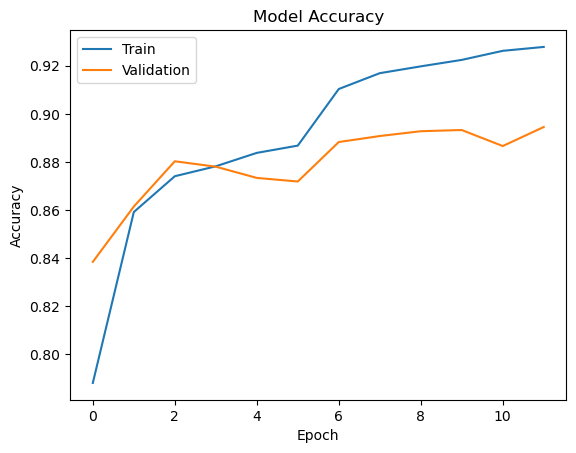

In [ ]:
# Plot the training and validation accuracy with the number of epochs
# creates a line plot of the training and validation accuracy over each epoch using the matplotlib library
# history dictionary contains the training and validation metrics for each epoch
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

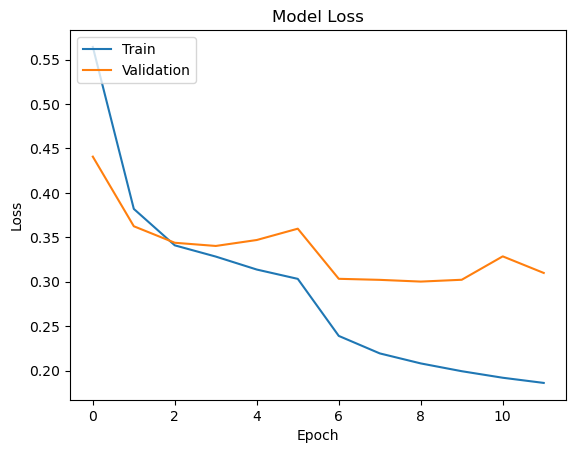

In [ ]:
# Plot the training and validation loss with the number of epochs
# creates a line plot of the training and validation loss over each epoch using the matplotlib library
# history dictionary contains the training and validation metrics for each epoch
plt.plot(history_2.history["loss"])
plt.plot(history_2.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
# check model generalization
# evaluate the performance of model with the best hyperparameters found during a hyperparameter search
score = model_with_best_parameters.evaluate(x_test, y_test)
print(score) 
print("The Loss Is {}".format(score[0]))
print("The Accuracy Is {}".format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2889 - accuracy: 0.9014
[0.2888912260532379, 0.9013901352882385]
The Loss Is 0.2888912260532379
The Accuracy Is 0.9013901352882385


# **Cross Validation**

In [ ]:
# cross validation
from keras.utils import np_utils
from sklearn.model_selection import KFold

In [ ]:
# Set the number of folds
k = 5
# Define the K-fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
# Initialize lists to store scores and histories
accuracies_val=[]
losses_val=[]
histories=[]

In [ ]:
# Loop over each fold
for fold, (train_indices, val_indices) in enumerate(kf.split(X_train)):
    print('*********************************************************************')
    print(f'Start of fold {fold+1} ...')
    print()


    # Define the training and validation data for this fold
    X_train_fold = x_train[train_indices]
    Y_train_fold = y_train[train_indices]
    X_val_fold = x_train[val_indices]
    Y_val_fold = y_train[val_indices]

    # Train the model on the training data for this fold
    history_3 = model_with_best_parameters.fit(X_train_fold, Y_train_fold, epochs=30, batch_size=128, verbose=1, validation_data=(X_val_fold, Y_val_fold))

    # Evaluate the model on the validation data for this fold
    score = model_with_best_parameters.evaluate(X_val_fold, Y_val_fold, verbose=0)

    # Print the validation accuracy and loss for this fold
    print(f'Validation accuracy for fold {fold+1}: {score[1]*100}%')
    print(f'Validation loss for fold {fold+1}: {score[0]}')

    # Store the validation accuracy and loss for this fold
    accuracies_val.append(score[1])
    losses_val.append(score[0])
    histories.append(history_3)
    print()
    print(f'End of fold {fold+1} ...')
    print('*********************************************************************')

*********************************************************************
Start of fold 1 ...

Epoch 1/30
300/300 [==============================] - 2s 5ms/step - loss: 0.2086 - accuracy: 0.9204 - val_loss: 0.2022 - val_accuracy: 0.9244
Epoch 2/30
300/300 [==============================] - 1s 5ms/step - loss: 0.1948 - accuracy: 0.9259 - val_loss: 0.2004 - val_accuracy: 0.9216
Epoch 3/30
300/300 [==============================] - 2s 5ms/step - loss: 0.1815 - accuracy: 0.9296 - val_loss: 0.2097 - val_accuracy: 0.9222
Epoch 4/30
300/300 [==============================] - 1s 5ms/step - loss: 0.1717 - accuracy: 0.9342 - val_loss: 0.2125 - val_accuracy: 0.9185
Epoch 5/30
300/300 [==============================] - 1s 5ms/step - loss: 0.1657 - accuracy: 0.9364 - val_loss: 0.2202 - val_accuracy: 0.9178
Epoch 6/30
300/300 [==============================] - 2s 5ms/step - loss: 0.1568 - accuracy: 0.9387 - val_loss: 0.2374 - val_accuracy: 0.9173
Epoch 7/30
300/300 [==============================] - 1s 

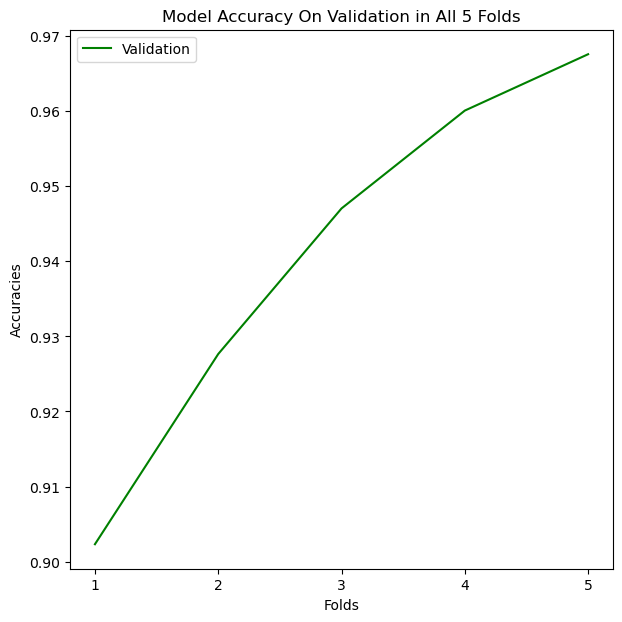

In [ ]:

"""
plots the validation accuracies of a Keras model across all k folds of a k-fold cross-validation
"""
plt.figure(figsize=(7,7))
plt.plot(range(1, k+1), accuracies_val,color='green')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Model Accuracy On Validation in All 5 Folds')
plt.ylabel('Accuracies')
plt.xlabel('Folds')
plt.legend(['Validation'], loc='upper left')
plt.show()

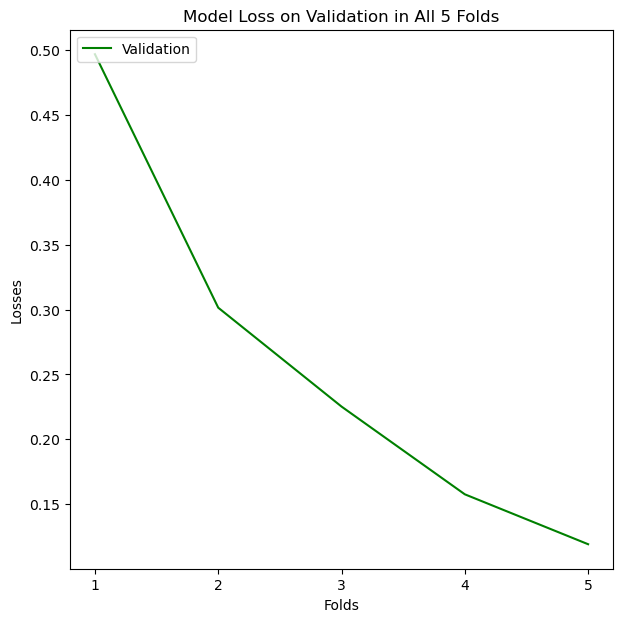

In [ ]:
"""
plots the validation loss of a Keras model across all k folds of a k-fold cross-validation
"""
plt.figure(figsize=(7,7))
plt.plot(range(1, k+1), losses_val,color='green')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Model Loss on Validation in All 5 Folds')
plt.ylabel('Losses')
plt.xlabel('Folds')
plt.legend(['Validation'], loc='upper left')
plt.show()

In [ ]:
 #The function plots the training and validation loss and accuracy of the model over each epoch, for the specified fold.
def display_kfold_result(history, k=1):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    # Train & Val Accuracy
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Loss")
    plt.plot(loss, label="Training")
    plt.plot(val_loss, label="Validation")
    plt.legend(loc="upper right")
    
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.plot(accuracy, label="Training")
    plt.plot(val_accuracy, label="Validation")
    plt.legend(loc="lower right")
    
    plt.suptitle("Fold-{}".format(k))
    plt.show()

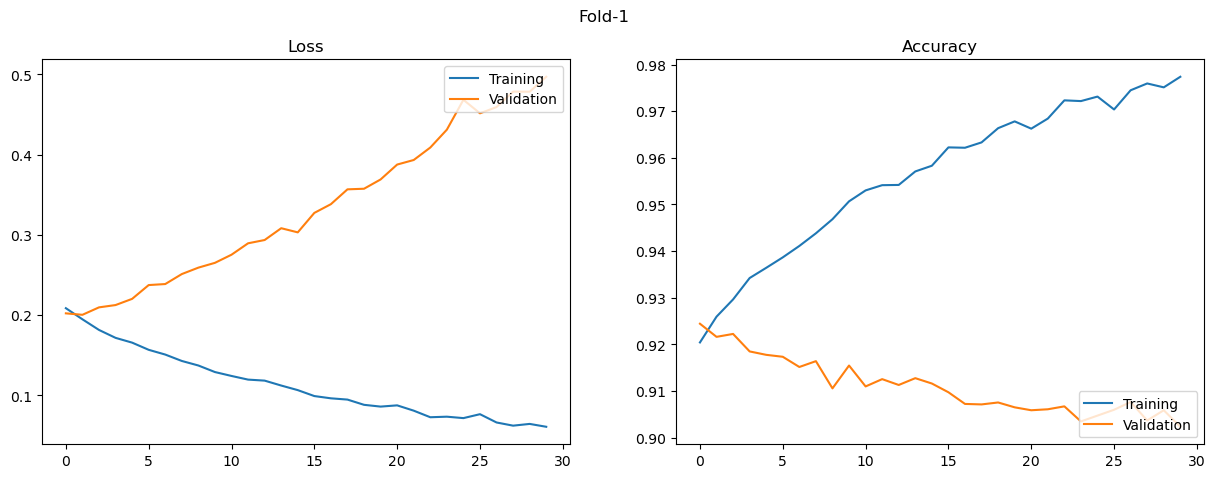

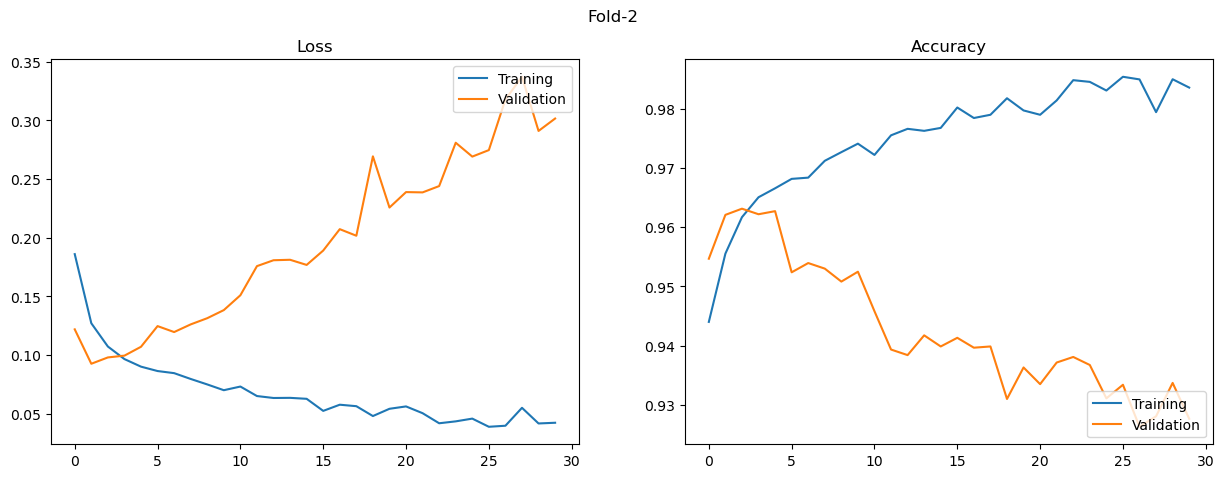

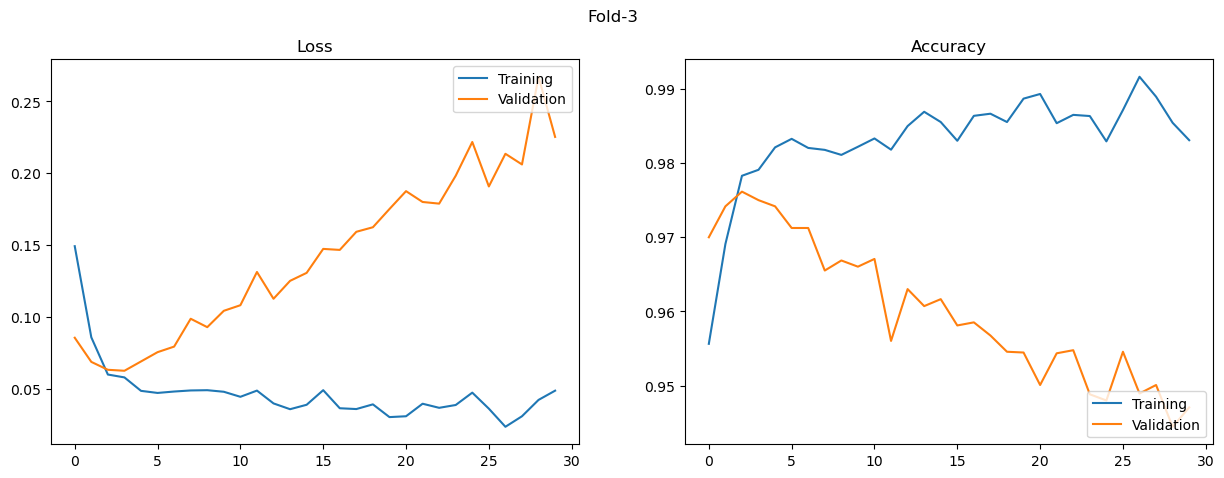

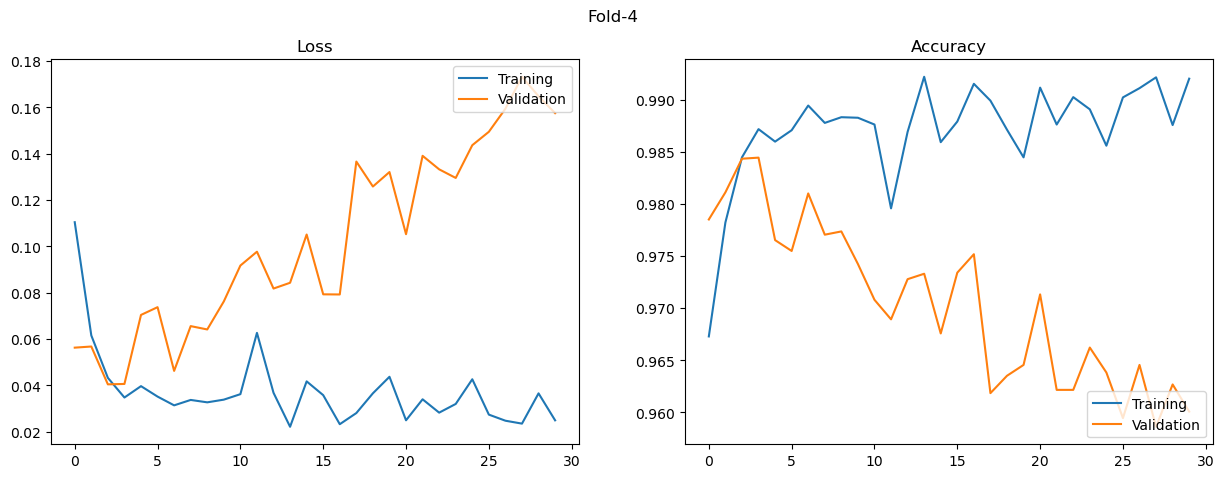

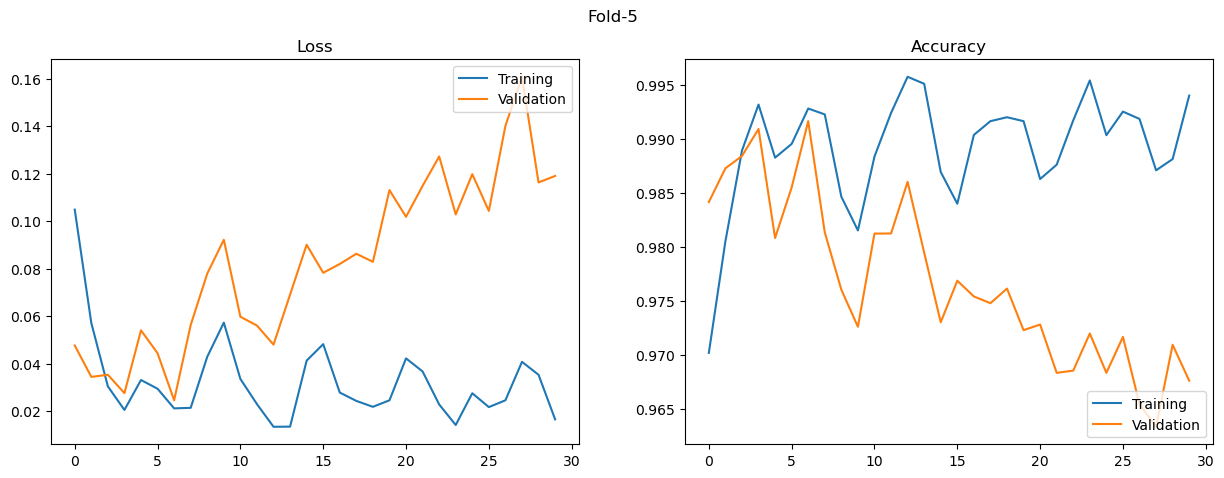

In [ ]:
for history in histories:
    display_kfold_result(history,histories.index(history)+1)

In [ ]:
# check model generalization
# evaluate the performance of model 
score = model_with_best_parameters.evaluate(x_test,y_test)
print(score) 
print("The Loss Is {}".format(score[0]))
print("The Accuracy Is {}".format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.5180 - accuracy: 0.8863
[1.5180010795593262, 0.8862886428833008]
The Loss Is 1.5180010795593262
The Accuracy Is 0.8862886428833008


# **Two Models**

****1-ResNet50****

****2-VGG16****


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print ("Before Expanding Dim : ")
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# expand new axis, channel axis 
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape)
# [optional]: we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# it's always better to normalize 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
x_train = tf.image.resize(x_train, [32,32]) # if we want to resize 
x_test = tf.image.resize(x_test, [32,32]) # if we want to resize 

print ("After Expanding Dim : ")
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Before Expanding Dim : 
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28, 1)
After Expanding Dim : 
(60000, 32, 32, 3) (60000,)
(10000, 32, 32, 3) (10000,)


# **ResNet50**



![ResNet image](https://www.researchgate.net/profile/Bendjillali-Ridha-Ilyas-2/publication/338253578/figure/fig3/AS:842071023824896@1577776785660/The-proposed-Resnet50-CNN-architecture.ppm "ResNet50")

**ResNet50 consists of 50 layers, and its architecture is based on the idea of residual connections. In a residual network, each layer learns a residual mapping that is added to the output of the previous layer. This allows the network to learn more complex functions and avoid the problem of vanishing gradients.**

In [ ]:
"""
1- This code defines a Keras model that uses the ResNet50 architecture 
2- the argument weights='imagenet'. The arguments include_top=False and input_shape=(32,32,3) 

3- The for loop is used to set all layers of the ResNet50 architecture to be non-trainable, 
   so that we can use the pre-trained weights as fixed features.

4- The remaining code defines the fully connected layers on top of the ResNet50 architecture.
5- The GlobalAveragePooling2D layer is used to reduce the  dimensions of the feature maps 
6- This is followed by three dense layers with 1024, 512, and 256 units, respectively, 
7- The final dense layer has 10 units and use softmax activation function.

8-the tf.keras.Model function is used to create a new Keras model 

"""
model = tf.keras.applications.ResNet50(weights='imagenet',include_top=False,input_shape=(32,32,3))
for layer in model.layers:
    layer.trainable = False
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
out = Dense(10, activation='softmax')(x)
model_final = tf.keras.Model( model.input,outputs=out) 


94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
"""
4- compile the model with The Adam optimizer,The CategoricalCrossentropy loss function and the accuracy metric
5- train  the model with 10 epoch and batch size is 128
"""
model_final.compile(optimizer='adam',loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history_4=model_final.fit(x_train, y_train,validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose = 1)

Epoch 1/10
469/469 [==============================] - 16s 25ms/step - loss: 0.9875 - accuracy: 0.6263 - val_loss: 0.8184 - val_accuracy: 0.6847
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.7118 - accuracy: 0.7243 - val_loss: 0.6611 - val_accuracy: 0.7530
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.6490 - accuracy: 0.7518 - val_loss: 0.6427 - val_accuracy: 0.7573
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.6180 - accuracy: 0.7641 - val_loss: 0.6306 - val_accuracy: 0.7655
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.6062 - accuracy: 0.7675 - val_loss: 0.6244 - val_accuracy: 0.7634
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 0.5881 - accuracy: 0.7761 - val_loss: 0.6269 - val_accuracy: 0.7648
Epoch 7/10
469/469 [==============================] - 10s 22ms/step - loss: 0.5829 - accuracy: 0.7790 - val_loss: 0.5819 - val_accuracy:

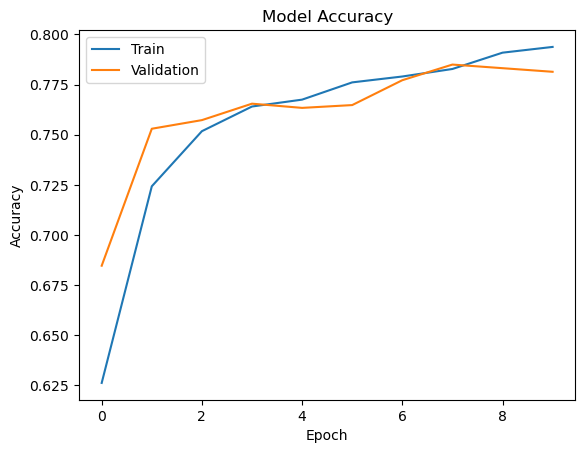

In [ ]:
# Plot the training and validation accuracy with the number of epochs
# creates a line plot of the training and validation accuracy over each epoch using the matplotlib library
# history dictionary contains the training and validation metrics for each epoch
plt.plot(history_4.history["accuracy"])
plt.plot(history_4.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

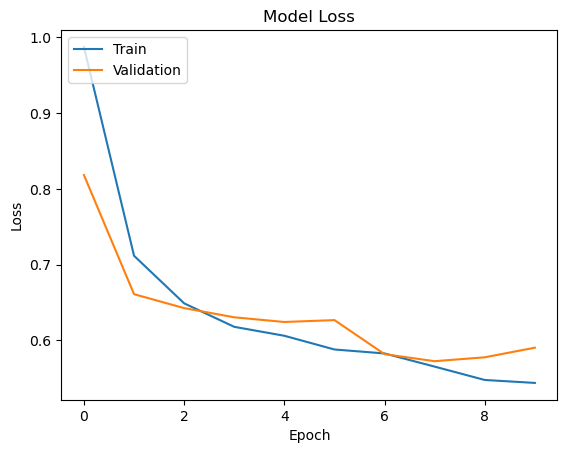

In [ ]:
# Plot the training and validation loss with the number of epochs
# creates a line plot of the training and validation loss over each epoch using the matplotlib library
# history dictionary contains the training and validation metrics for each epoch
plt.plot(history_4.history["loss"])
plt.plot(history_4.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
# check model generalization
# evaluate the performance of model 
score = model_final.evaluate(x_test,y_test)
print(score) 
print("The Loss Is {}".format(score[0]))
print("The Accuracy Is {}".format(score[1]))

313/313 [==============================] - 4s 13ms/step - loss: 0.5905 - accuracy: 0.7814
[0.59047532081604, 0.7814000248908997]
The Loss Is 0.59047532081604
The Accuracy Is 0.7814000248908997


# **VGG16**

![VGG16 image](https://upload.wikimedia.org/wikipedia/commons/2/24/VGG16.png "VGG16")

**VGG16 consists of 16 layers, and its architecture is based on the idea of using smaller convolutional filters (3x3) with a smaller stride (1) in order to improve the discriminative power of the network, while keeping the number of parameters manageable. It also uses max pooling layers to reduce the spatial dimensions of the feature maps.**

In [ ]:

"""
1- This code defines a Keras model that uses the VGG16 architecture 
2- the argument weights='imagenet'. The arguments include_top=False and input_shape=(32,32,3) 
3- The for loop is used to set all layers of the VGG16 architecture to be non-trainable, 
   so that we can use the pre-trained weights as fixed features.

4- The remaining code defines the fully connected layers on top of the ResNet50 architecture.
5- The GlobalAveragePooling2D layer is used to reduce the  dimensions of the feature maps 
6- This is followed by one dense layer with 1024 units 
7- The final dense layer has 10 units and use softmax activation function.

8-the tf.keras.Model function is used to create a new Keras model 

"""
model = VGG16(weights='imagenet',include_top=False, input_shape=(32,32,3))

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False

# Add Dense layer as in VGG16
output = model.output
output = GlobalAveragePooling2D()(output)
output = Dense(1024, activation='relu')(output)
output = Dense(units=10, activation='softmax')(output)
model_final2 = tf.keras.Model(model.input, output)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
"""
4- compile the model with The Adam optimizer,The CategoricalCrossentropy loss function and the accuracy metric
5- train  the model with 10 epoch and batch size is 128
"""
model_final2.compile(optimizer='adam',loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history_5=model_final2.fit(x_train, y_train,validation_data=(x_test,y_test), batch_size=128, epochs=10, verbose = 1)

Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 0.5322 - accuracy: 0.8104 - val_loss: 0.4685 - val_accuracy: 0.8347
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.4010 - accuracy: 0.8523 - val_loss: 0.3955 - val_accuracy: 0.8566
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.3659 - accuracy: 0.8656 - val_loss: 0.4010 - val_accuracy: 0.8538
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3405 - accuracy: 0.8736 - val_loss: 0.3720 - val_accuracy: 0.8650
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3210 - accuracy: 0.8804 - val_loss: 0.3733 - val_accuracy: 0.8611
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3067 - accuracy: 0.8860 - val_loss: 0.3739 - val_accuracy: 0.8614
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2900 - accuracy: 0.8910 - val_loss: 0.3580 - val_accuracy: 0.8722

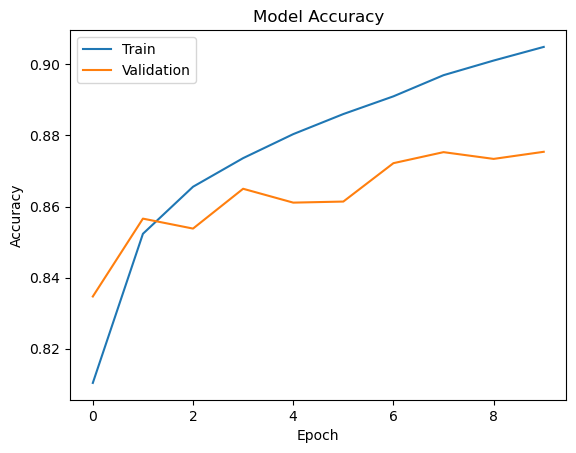

In [ ]:
# Plot the training and validation accuracy with the number of epochs
# creates a line plot of the training and validation accuracy over each epoch using the matplotlib library
# history dictionary contains the training and validation metrics for each epoch
plt.plot(history_5.history["accuracy"])
plt.plot(history_5.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

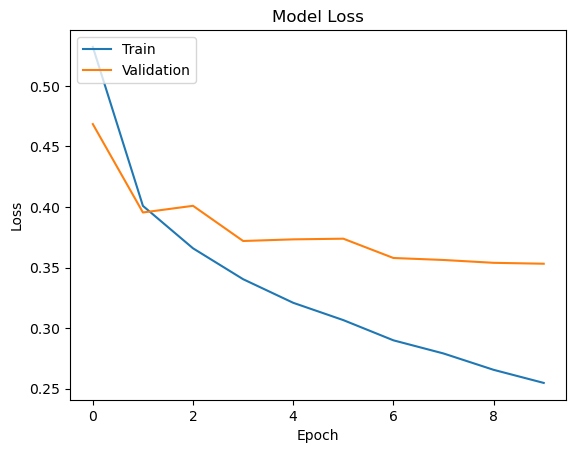

In [ ]:
# Plot the training and validation loss with the number of epochs
# creates a line plot of the training and validation loss over each epoch using the matplotlib library
# history dictionary contains the training and validation metrics for each epoch
plt.plot(history_5.history["loss"])
plt.plot(history_5.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
# check model generalization
# evaluate the performance of model 
score = model_final2.evaluate(x_test,y_test)
print(score) 
print("The Loss Is {}".format(score[0]))
print("The Accuracy Is {}".format(score[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.3532 - accuracy: 0.8754
[0.3532305061817169, 0.8754000067710876]
The Loss Is 0.3532305061817169
The Accuracy Is 0.8754000067710876
